In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score  
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# чтение файлов для обучения

In [7]:
training_set = pd.read_csv('/Users/ivansinazhenski/Documents/Документы Office/Учеба/Введение_в_МО/Чудо_Экзамен/Банковский маркетинг/training_set_label.csv')

# смотрим на данные

In [8]:
training_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [10]:
# смотрим все коллонки
for cl in training_set.columns:
    print('------',cl.upper(),'-----')
    print()
    print(training_set[cl].value_counts(), end='\n\n\n\n')

------ AGE -----

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
26     805
56     778
59     770
58     740
60     596
25     527
24     302
23     202
61     147
22     129
62      80
21      79
63      77
64      74
70      67
66      63
65      59
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, dtype: int64



------ JOB -----

blue-collar      9732
management       9458
technician       7597
admin.           5171
se

# проверка на пустые значения

In [11]:
training_set.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

# кодируем категориальные поля

In [12]:
%%time
# создаем словари для кодирования по методу "оценка вероятности"

cod_dict = {}
for cl in training_set.columns:
    try:
        training_set[cl] = training_set[cl].astype('float')
    except:
        cod_dict[cl] = training_set[cl].value_counts().to_frame()
        for i in cod_dict[cl].index:
            cod_dict[cl].loc[i, 'meaning'] = training_set[training_set[cl] == i]['subscribe'].sum()/cod_dict[cl].loc[i, cl]
        print('------',cl.upper(),'-----')
        print()
        print(cod_dict[cl], end='\n\n\n\n')  

------ JOB -----

                job   meaning
blue-collar    9732  0.072750
management     9458  0.137556
technician     7597  0.110570
admin.         5171  0.122027
services       4154  0.088830
retired        2264  0.227915
self-employed  1579  0.118429
entrepreneur   1487  0.082717
unemployed     1303  0.155027
housemaid      1240  0.087903
student         938  0.286780
unknown         288  0.118056



------ MARITAL -----

          marital   meaning
married     27214  0.101235
single      12790  0.149492
divorced     5207  0.119455



------ EDUCATION -----

           education   meaning
secondary      23202  0.105594
tertiary       13301  0.150064
primary         6851  0.086265
unknown         1857  0.135703



------ DEFAULT -----

     default   meaning
no     44396  0.117961
yes      815  0.063804



------ HOUSING -----

     housing   meaning
yes    25130  0.077000
no     20081  0.167024



------ LOAN -----

      loan   meaning
no   37967  0.126557
yes   7244  0.066814


In [13]:
%%time
coding_training_set = training_set.copy()

for cl in coding_training_set.columns:
    if list(cod_dict.keys()).count(cl) == 1:
        for i in cod_dict[cl].index:
            coding_training_set.loc[coding_training_set[coding_training_set[cl] == i].index, cl] = cod_dict[cl].loc[i, 'meaning']

CPU times: user 374 ms, sys: 26.2 ms, total: 400 ms
Wall time: 441 ms


In [15]:
coding_training_set.corr().style.background_gradient(cmap='coolwarm')

,age,balance,day,duration,campaign,pdays,previous,subscribe
age,1,0.0977827,-0.00912005,-0.00464843,0.00476031,-0.023758,0.00128832,0.025155
balance,0.0977827,1,0.00450259,0.0215604,-0.0145783,0.00343532,0.0166736,0.0528384
day,-0.00912005,0.00450259,1,-0.0302063,0.16249,-0.0930441,-0.0517105,-0.0283478
duration,-0.00464843,0.0215604,-0.0302063,1,-0.0845695,-0.00156477,0.00120306,0.394521
campaign,0.00476031,-0.0145783,0.16249,-0.0845695,1,-0.0886277,-0.0328553,-0.073172
pdays,-0.023758,0.00343532,-0.0930441,-0.00156477,-0.0886277,1,0.45482,0.103621
previous,0.00128832,0.0166736,-0.0517105,0.00120306,-0.0328553,0.45482,1,0.0932358
subscribe,0.025155,0.0528384,-0.0283478,0.394521,-0.073172,0.103621,0.0932358,1


# обучение модели

## разбиение на тренировочные и тестовые данные

In [10]:
X = coding_training_set.drop('subscribe', axis=1)
y = coding_training_set['subscribe']

X_train,  X_test,y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [11]:
scale_features_mm = MinMaxScaler() 

X_train = scale_features_mm.fit_transform(X_train)
X_test = scale_features_mm.transform(X_test)

## обучение

In [12]:
%%time

svc = SVC(C=10, class_weight={0:1, 1:2}) # class_weight  настроить
svc = svc.fit(X_train, y_train)

CPU times: user 19 s, sys: 414 ms, total: 19.4 s
Wall time: 22.3 s


# тестироание, метрики

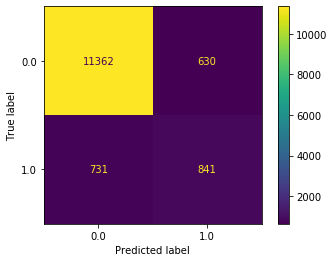

In [13]:
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='d')
plt.show()

In [14]:
p = svc.predict(X_test)
print('accuracy', accuracy_score(y_test, p))
print('f score', metrics.f1_score(y_test, p)) 
# print(metrics.recall_score(y_test, p)) 
# print(metrics.precision_score(y_test, p))

accuracy 0.8996608670008847
f score 0.5527440026289846


# чтение данных для предсказания

In [15]:
test_set = pd.read_csv('/Users/ivansinazhenski/Documents/Документы Office/Учеба/Введение_в_МО/Чудо_Экзамен/Банковский маркетинг/testing_set_label.csv')

# выделяем нужные признаки

In [16]:
test_set=test_set.loc[:,training_set.drop('subscribe', axis=1).columns]

# кодируем тестовый файл

In [17]:
%%time
coding_test_set = test_set.copy()

for cl in coding_test_set.columns:
    if list(cod_dict.keys()).count(cl) == 1:
        for i in cod_dict[cl].index:
            coding_test_set.loc[coding_test_set[coding_test_set[cl] == i].index, cl] = cod_dict[cl].loc[i, 'meaning']

CPU times: user 118 ms, sys: 4.45 ms, total: 123 ms
Wall time: 124 ms


In [18]:
coding_test_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,0.137556,0.149492,0.150064,0.117961,747,0.167024,0.126557,0.149189,23,0.166478,141,2,176,3,0.126097
1,36,0.118429,0.101235,0.150064,0.117961,307,0.0769996,0.126557,0.149189,14,0.0671945,341,1,330,2,0.166848
2,39,0.11057,0.101235,0.105594,0.117961,147,0.0769996,0.126557,0.149189,6,0.0671945,151,2,-1,0,0.091615
3,41,0.0827169,0.101235,0.150064,0.117961,221,0.0769996,0.126557,0.0407066,14,0.0671945,57,2,-1,0,0.091615
4,43,0.08883,0.101235,0.0862648,0.117961,-88,0.0769996,0.0668139,0.149189,17,0.196794,313,1,147,2,0.126097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,46,0.0727497,0.101235,0.105594,0.117961,668,0.0769996,0.126557,0.0407066,15,0.0671945,1263,2,-1,0,0.091615
4505,40,0.0727497,0.101235,0.105594,0.117961,1100,0.0769996,0.126557,0.0407066,29,0.0671945,660,2,-1,0,0.091615
4506,49,0.0727497,0.101235,0.105594,0.117961,322,0.167024,0.126557,0.149189,14,0.110133,356,2,-1,0,0.091615
4507,38,0.0727497,0.101235,0.105594,0.117961,1205,0.0769996,0.126557,0.149189,20,0.196794,45,4,153,1,0.126097


# проводим нормализацию

In [19]:
coding_test_set = scale_features_mm.transform(coding_test_set)

In [20]:
test_set['prediction'] = svc.predict(coding_test_set)

# результат

In [21]:
# print('Абсолютное предсказание')
test_set['prediction'].value_counts()

0.0    4004
1.0     505
Name: prediction, dtype: int64

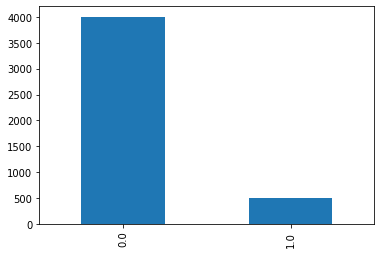

In [22]:
test_set['prediction'].value_counts().plot(kind='bar')
plt.show()

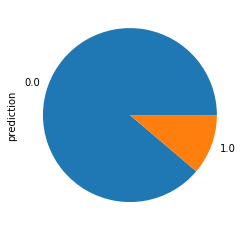

In [23]:
test_set['prediction'].value_counts(normalize=True).plot(kind='pie', )
plt.show()